In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("data_pepe.xlsx")

# Loại bỏ cột không cần thiết
drop_cols = ['pkSeqID', 'stime', 'flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 
             'category', 'subcategory ', 'state']
df = df.drop(columns=drop_cols, errors='ignore')

In [4]:
df = df.loc[:, df.isnull().mean() < 0.5]

In [5]:
df = df.fillna(df.mean(numeric_only=True))

In [6]:
# Tách dữ liệu
X = df.drop(columns=['attack'])
y = df['attack']

In [7]:
# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Huấn luyện SVM
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

In [10]:
# Dự đoán và đánh giá
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, y_pred)

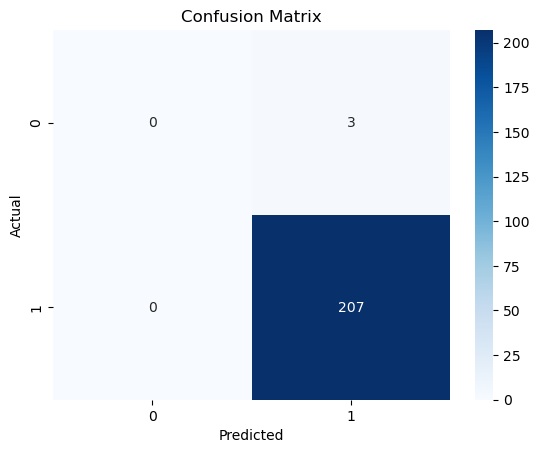

In [11]:
# Vẽ confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

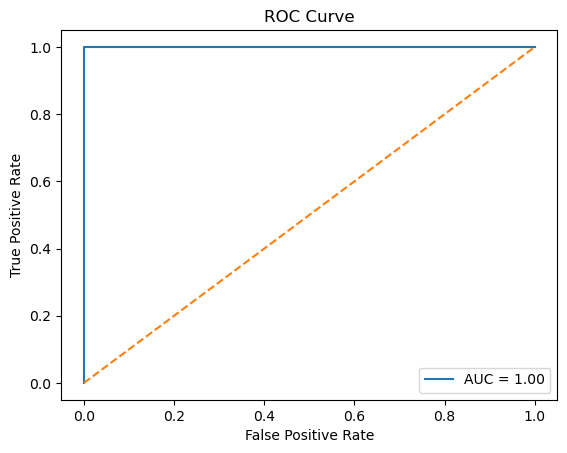

In [12]:
# Vẽ ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()